In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import numpy as np

In [2]:
batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col = 28, 28

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

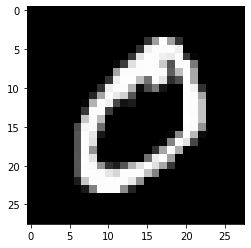

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1], cmap='gray')
plt.show()

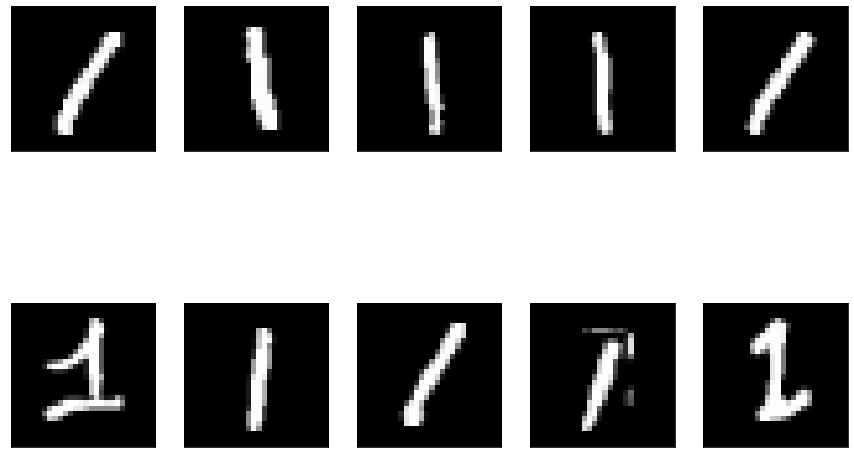

In [5]:
fig = plt.figure(figsize=(15, 10))

i = 0
for f in range(0, y_train.shape[0]):
    if(y_train[f] == 1 and i < 10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_train[f], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        i = i + 1

plt.show()

In [6]:
print("x_train: {}\nx_test: {}\n".format(
    x_train.shape, x_test.shape, ))

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [7]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)

In [8]:
print(y_test[0])

7


In [9]:
from keras.utils import np_utils

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [10]:
print("x_train: {}\nx_test: {}\ninput_shape: {}\n\
# of training samples: {}\n# of testing samples: {}".format(
    x_train.shape, x_test.shape, input_shape, x_train.shape[0],
    x_test.shape[0]))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
input_shape: (28, 28, 1)
# of training samples: 60000
# of testing samples: 10000


In [11]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [12]:
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
469/469 [==============================] - 44s 65ms/step - loss: 0.4549 - accuracy: 0.8573 - val_loss: 0.0516 - val_accuracy: 0.9838
Epoch 2/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0931 - accuracy: 0.9709 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 3/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 4/15
469/469 [==============================] - 31s 67ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 5/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0302 - val_accuracy: 0.9906
Epoch 6/15
469/469 [==============================] - 31s 65ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0267 - val_accuracy: 0.9917
Epoch 7/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0295 - val_accuracy:

In [13]:
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC: {:.2%}".format(auc))

AUC: 99.58%


In [14]:
np.round(preds)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
preds = model.predict(x_test)
print("Predictions for x_test[0]: {}\n\nActual label for x_test[0]: {}\n".format(
    preds[0], y_test[0]))
print("Predictions for x_test[0] after rounding: {}\n".format(
    np.round(preds)[0]))

Predictions for x_test[0]: [7.4765190e-17 4.5625032e-12 6.8259148e-12 3.0499620e-12 4.5443731e-14
 2.0908610e-14 2.4358361e-21 1.0000000e+00 8.2378025e-16 7.0998263e-10]

Actual label for x_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Predictions for x_test[0] after rounding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



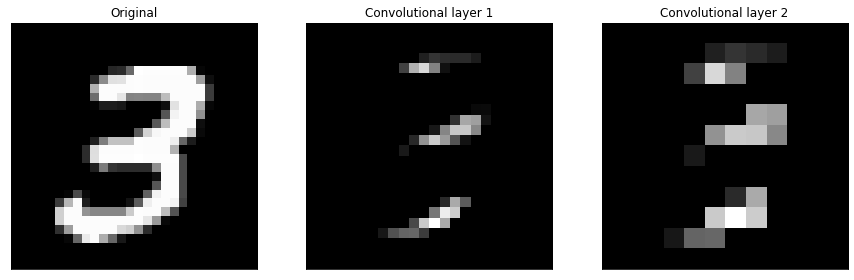

In [16]:
from keras import models

layers = [layer.output for layer in model.layers[:4]]
model_layers = models.Model(inputs=model.input, outputs=layers)
activations = model_layers.predict(x_train)

fig = plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
    plt.subplot(1, 3, f + 1)
    plt.title("Convolutional layer %d" % f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[7, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()